In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob

In [16]:
dir = '/content/drive/MyDrive/Datasets/train/'

name_classes = ['Apple Golden 1', 'Banana', 'Blueberry', 'Cherry 1', 'Grape Pink', 
                'Kiwi', 'Lemon', 'Mango', 'Orange', 'Watermelon']

In [17]:
name = ['Apple_Golden_1', 'Banana', 'Blueberry', 'Cherry_1', 'Grape_Pink', 
                'Kiwi', 'Lemon', 'Mango', 'Orange', 'Watermelon']

for i in range(len(name)):
  name[i] = list()

In [18]:
for i in range(len(name)):
  dirname = dir + name_classes[i] +'/' + '*.jpg'
  for img in glob.glob(dirname):
    name[i].append(img_to_array(load_img(img,target_size=(100,100))))

In [19]:
input_data = np.array(name[0] + name[1] + name[2] + name[3] + name[4] + name[5] + name[6] + name[7] + name[8] + name[9])
print(input_data.shape)

(4818, 100, 100, 3)


In [20]:
input_labels = np.array([0]*len(name[0]) + [1]*len(name[1]) + [2]*len(name[2]) + [3]*len(name[3]) 
                        + [4]*len(name[4]) + [5]*len(name[5]) + [6]*len(name[6])
                        + [7]*len(name[7]) + [8]*len(name[8]) + [9]*len(name[9]))
print(input_labels.shape)

(4818,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(input_data, input_labels, train_size=0.8, test_size=0.2, random_state= 0)

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test/= 255

In [23]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [24]:
print(y_test)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [43]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (100,100,3)))
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation = 'softmax'))

In [44]:
opt = SGD(lr = 0.01,momentum = 0.9)

model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [45]:
history = model.fit(X_train, y_train,epochs=10,batch_size = 64,validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
61/61 [==============================] - 4s 66ms/step - loss: 2.4567 - accuracy: 0.1956 - val_loss: 2.2448 - val_accuracy: 0.1929
Epoch 2/10
61/61 [==============================] - 4s 61ms/step - loss: 2.2277 - accuracy: 0.1998 - val_loss: 2.0057 - val_accuracy: 0.2925
Epoch 3/10
61/61 [==============================] - 4s 62ms/step - loss: 0.8300 - accuracy: 0.6897 - val_loss: 0.1887 - val_accuracy: 0.9367
Epoch 4/10
61/61 [==============================] - 4s 61ms/step - loss: 0.6124 - accuracy: 0.8306 - val_loss: 1.6893 - val_accuracy: 0.5674
Epoch 5/10
61/61 [==============================] - 4s 61ms/step - loss: 0.4472 - accuracy: 0.8550 - val_loss: 0.2412 - val_accuracy: 0.9388
Epoch 6/10
61/61 [==============================] - 4s 61ms/step - loss: 0.0462 - accuracy: 0.9850 - val_loss: 9.0785e-04 - val_accuracy: 1.0000
Epoch 7/10
61/61 [==============================] - 4s 62ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 3.4373e-04 - val_accuracy: 1.0000
Epoch

In [46]:
model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 14ms/step - loss: 2.5212e-05 - accuracy: 1.0000


[2.521237183827907e-05, 1.0]

In [52]:
model.save('fruit10.h5')

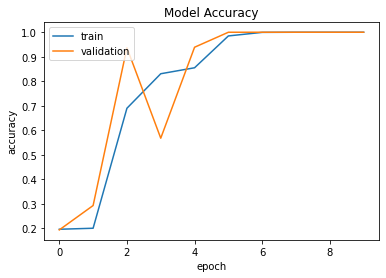

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [48]:
y_pred = model.predict(X_test)

Banana


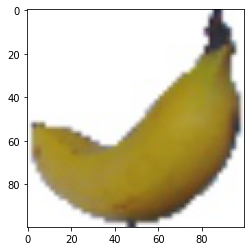

In [50]:
img = load_img('1_100.jpg',target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
print(name_classes[np.argmax(model.predict(img),axis = 1)[0]])

Cherry 1


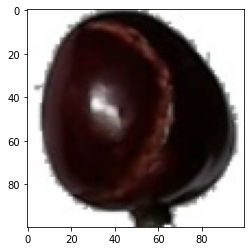

In [51]:
img = load_img('2_100.jpg',target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
print(name_classes[np.argmax(model.predict(img),axis = 1)[0]])